# Depth Function Analysis of Taxon 106656

### Importing modules

In [1]:
try:
    import pyobis
except:
    %pip -q install pyobis
    import pyobis

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as np
import cartopy
import geopandas as gpd
import geoplot as gplt
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
from pyobis.occurrences import OccQuery
occ = OccQuery()

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (15,10)

## Fetching data
We are fetching data for only *Oithona similis* to figure out co-occurrence between several zoo-planton species.

In [5]:
data = occ.search(
    geometry = "POLYGON ((152.3438 -66.5591, 54.1406 -66.5591, 54.1406 -42.1362, 152.3438 -42.1362, 152.3438 -66.5591))",
    startdate = "1999-01-01",
    enddate = "2017-12-31",
    taxonid = 106656,
)

Fetching: [████████████████████████████████████████████████████████████████████████████████████████████████████] 37160/37160
Fetched 37160 records.


## Analysis

Timestamps (winter and summer)
+ 1 May 2012 -> 1335868163000
+ 31 July 2012 -> 1354357763000
+ 1 Dec 2012 -> 1354357763000
+ 15 Feb 2013 -> 1362047363000

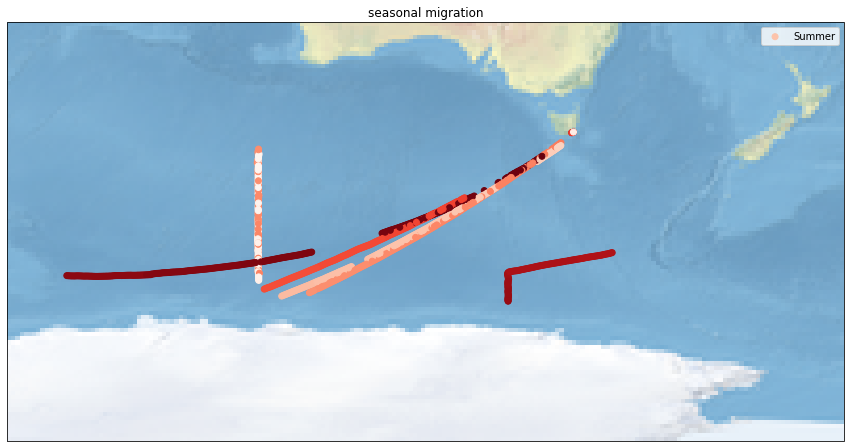

In [6]:
ax = plt.axes(projection=cartopy.crs.PlateCarree())
ax.stock_img()


ax.scatter(x="decimalLongitude", y="decimalLatitude", c = "date_mid", cmap="Reds", data=data[data["date_mid"].between(1354357763000, 1362047363000)], transform=cartopy.crs.PlateCarree(), label = "Summer")
ax.set_xlim(80,180)
ax.set_ylim(-80, -30)
ax.set_title("seasonal migration")
plt.legend()
plt.show()

<AxesSubplot:xlabel='year', ylabel='sst'>

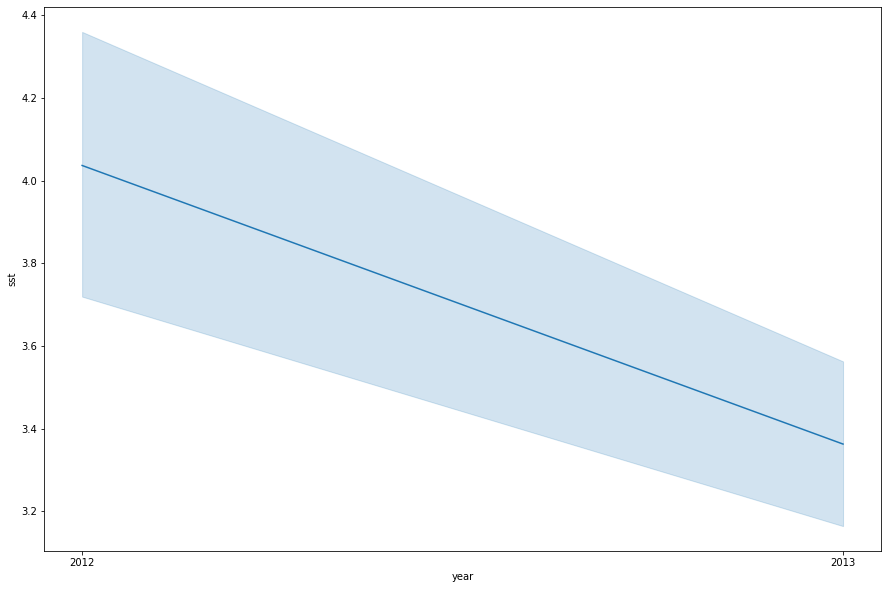

In [7]:
sns.lineplot(x="year", y="sst", data=data[(data["date_mid"].between(1354357763000, 1362047363000)) ])

As temeprature starts dropping they are moving norther, away from Antartica and towards Australia.

### Is depth a function of temperature?

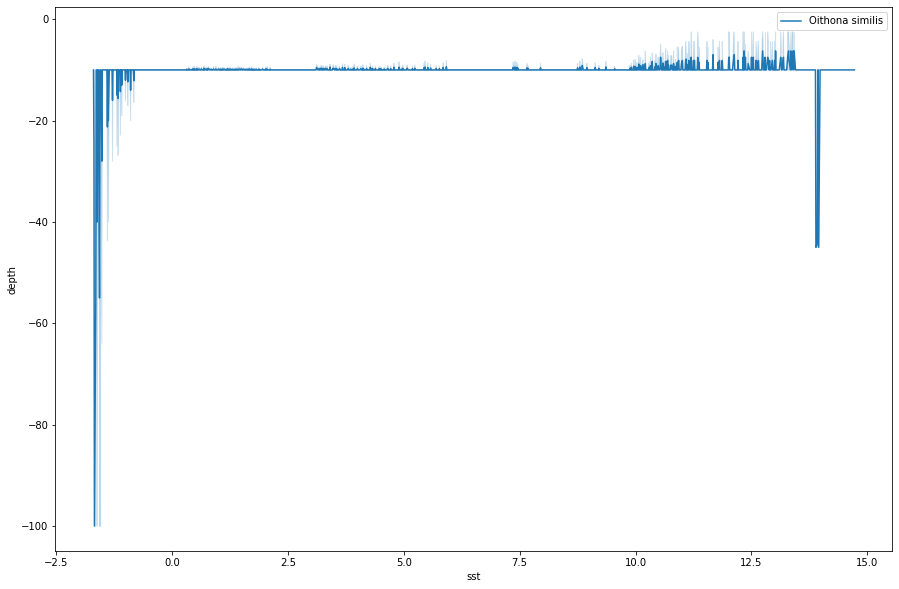

In [8]:
sns.lineplot(x = "sst", y = -data["depth"], data = data, label="Oithona similis");

YES, it is! We can clearly see that as temperature increases *Oithona Similis* moves towards the surface in search of warmer waters. And when the water surface became too hotter it again went down a little.

<AxesSubplot:xlabel='sst', ylabel='decimalLatitude'>

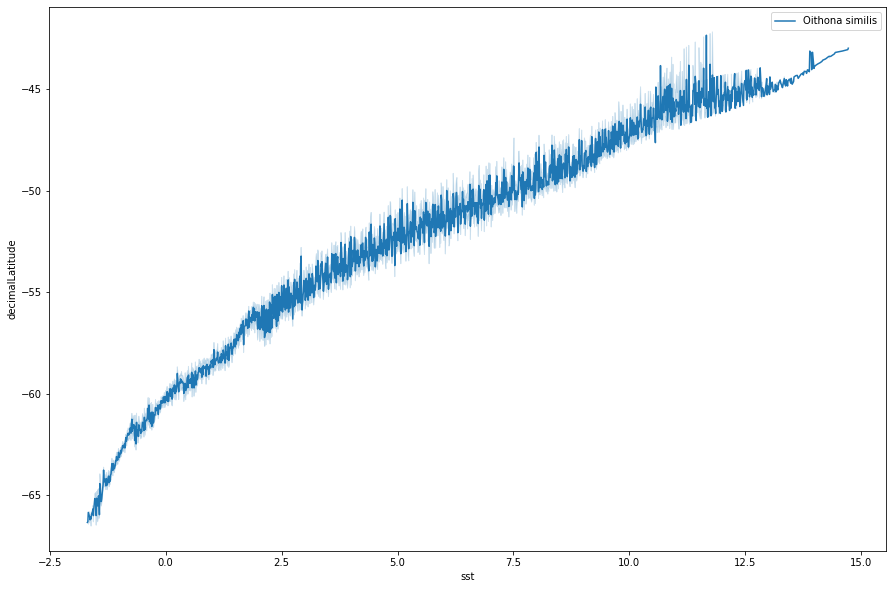

In [9]:
sns.lineplot(x = 'sst', y='decimalLatitude', data=data, label="Oithona similis")

Sea surface temeprature rises as latitude rises, and that is why Oithona Similis migrates to norther latitudes as winter kicks in.

## Latitude v/s Salinity/Temperature/Depth Analysis

<AxesSubplot:xlabel='decimalLatitude', ylabel='depth'>

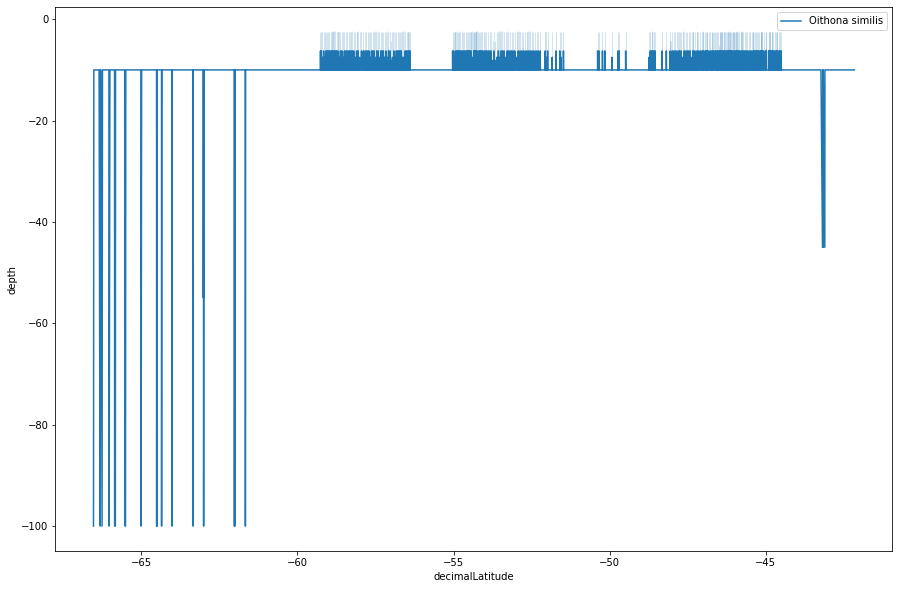

In [10]:
sns.lineplot(x = 'decimalLatitude', y=-data["depth"], data=data, label="Oithona similis")

Perhaps not much data so not better corelation.

## Is depth a function of SSS?

<AxesSubplot:xlabel='sss', ylabel='depth'>

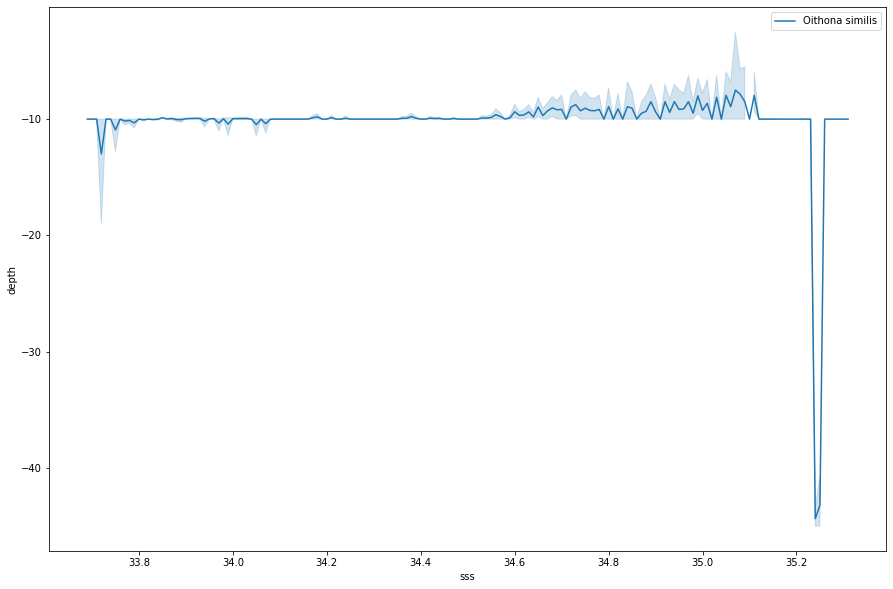

In [11]:
sns.lineplot(x = 'sss', y=-data["depth"], data=data, label="Oithona similis")

Perhaps, no.

## Extrapolate on multi year seasonal migration patterns.

## Conclusions
+ Oithona similis and Calanoida are highly co-occurrant, at same places, same physical and climatic conditions, and in similar numbers.
    + we need to find out why?
+ For Oithona similis, depth is a function of sea surface temperature. As the temperature incresease, organisms move towards the surface and if it becomes even hotter it goes down a bit to the suitable depth range.
    + they are so adaptive!
+ As the temperatures drop around winter, Oithona similis start moving norther, away from antartica towards australia. 
    + above two facts hint that they are not so cold water species.